# Image Classification with fastai library
- First, install `fastai` library
  - `fastbook` is a library for using `fastai` on Jupyter Notebook
  - if you install `fastbook`, it will automatically install `fastai`

In [ ]:
!pip install -Uqq fastbook # -U for --upgrade, -q for quiet
# import fastbook
from fastbook import *

     |████████████████████████████████| 720 kB 5.4 MB/s 
     |████████████████████████████████| 46 kB 1.9 MB/s 
     |████████████████████████████████| 189 kB 32.6 MB/s 
     |████████████████████████████████| 1.2 MB 37.3 MB/s 
     |████████████████████████████████| 56 kB 4.2 MB/s 
     |████████████████████████████████| 51 kB 329 kB/s 


### `from fastai.vision.all import *`
- This command will import every function, class, and variable as global variables
  - You can check what kind of variables are defined in notebook by calling `who` or `whos`

In [ ]:
from fastai.vision.all import *

## 1. Download Dataset
- `untar_data` will download the dataset and unzip the file 
  - It returns `pathlib.Path` object that represents a directory path of the downloaded dataset

In [ ]:
??untar_data

In [ ]:
URLs.PETS

'https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet.tgz'

In [ ]:
path = untar_data(URLs.PETS)
print(path)

/root/.fastai/data/oxford-iiit-pet


### `pathlib.Path`
- Convenient way to represent file or directory path in Python
- [Tutorial link](https://towardsdatascience.com/10-examples-to-master-python-pathlib-1249cc77de0b)
- Important Methods
  - You can list (ls) the directory or files in the path using ls()

- Caution: `fastai` Path is a modified version of Python's `pathlib.Path`
  - It will return `L`, which is a fastai-modified version of Python `list`
  - [Documentation of L](https://fastcore.fast.ai/foundation.html#L)


In [ ]:
path # the directory path of our downloaded dataset
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/annotations'),Path('/root/.fastai/data/oxford-iiit-pet/images')]

- You can make another path that is a subdirectory or subfile in the directory
  - by using `/`

In [ ]:
image_path = path / 'images'
print(image_path)

/root/.fastai/data/oxford-iiit-pet/images


In [ ]:
# usually / means division in python
4/2

2.0

In [ ]:
list_of_file = image_path.ls()
print(type(list_of_file))
list_of_file

<class 'fastcore.foundation.L'>


(#7393) [Path('/root/.fastai/data/oxford-iiit-pet/images/english_setter_196.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/shiba_inu_176.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Ragdoll_196.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/keeshond_169.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/miniature_pinscher_49.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/scottish_terrier_63.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Bengal_71.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/basset_hound_128.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/boxer_21.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_33.jpg')...]

- Take the 0th image in the directory

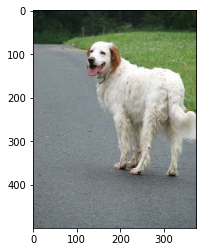

In [ ]:
from PIL import Image # Python Image Library
fname = list_of_file[0]
image = Image.open(fname)
plt.imshow(image)

/root/.fastai/data/oxford-iiit-pet/images/english_setter_196.jpg
/root/.fastai/data/oxford-iiit-pet/images/shiba_inu_176.jpg
/root/.fastai/data/oxford-iiit-pet/images/Ragdoll_196.jpg
/root/.fastai/data/oxford-iiit-pet/images/keeshond_169.jpg
/root/.fastai/data/oxford-iiit-pet/images/miniature_pinscher_49.jpg
/root/.fastai/data/oxford-iiit-pet/images/scottish_terrier_63.jpg
/root/.fastai/data/oxford-iiit-pet/images/Bengal_71.jpg
/root/.fastai/data/oxford-iiit-pet/images/basset_hound_128.jpg
/root/.fastai/data/oxford-iiit-pet/images/boxer_21.jpg
/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_33.jpg


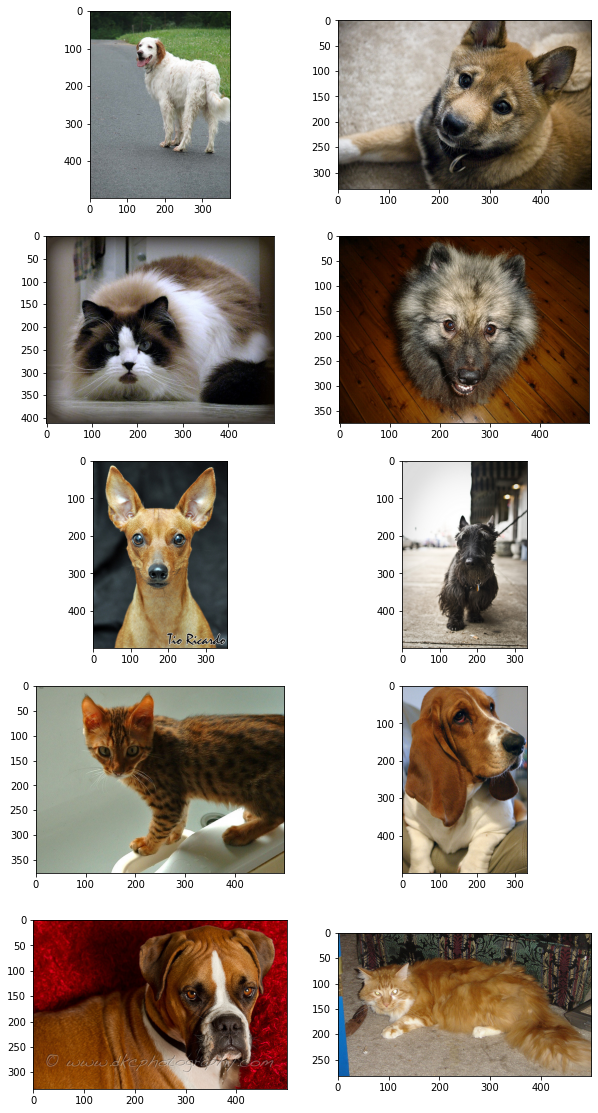

In [ ]:
# Let's make it in a loop
plt.figure(figsize=(10,20))
for i in range(10):
  fname = list_of_file[i]
  print(fname)
  image = Image.open(fname)
  plt.subplot(5,2, i+1)
  plt.imshow(image)

### Regular Expression
- [Practice with quiz](https://regexone.com/)
- [Test bed](https://regexr.com/)

In [ ]:
print(fname)
#pathlib Path has several attributes
# name
print(fname.name)
# stem
print(fname.stem)

/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_33.jpg
Maine_Coon_33.jpg
Maine_Coon_33


In [ ]:
re.findall(r'(.+)_\d+.jpg', fname.name)

['Maine_Coon']

In [ ]:
for img_fname in list_of_file:
  print(img_fname.name, re.findall(r'(.+)_\d+.jpg', img_fname.name))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
samoyed_16.jpg ['samoyed']
samoyed_103.jpg ['samoyed']
Persian_143.jpg ['Persian']
american_bulldog_42.jpg ['american_bulldog']
miniature_pinscher_120.jpg ['miniature_pinscher']
pug_139.jpg ['pug']
yorkshire_terrier_35.jpg ['yorkshire_terrier']
yorkshire_terrier_146.jpg ['yorkshire_terrier']
Birman_106.jpg ['Birman']
Bombay_214.jpg ['Bombay']
Ragdoll_5.jpg ['Ragdoll']
Persian_77.jpg ['Persian']
american_bulldog_134.jpg ['american_bulldog']
Russian_Blue_158.jpg ['Russian_Blue']
Maine_Coon_81.jpg ['Maine_Coon']
miniature_pinscher_7.jpg ['miniature_pinscher']
staffordshire_bull_terrier_59.jpg ['staffordshire_bull_terrier']
miniature_pinscher_171.jpg ['miniature_pinscher']
pomeranian_65.jpg ['pomeranian']
shiba_inu_153.jpg ['shiba_inu']
great_pyrenees_152.jpg ['great_pyrenees']
miniature_pinscher_106.jpg ['miniature_pinscher']
german_shorthaired_58.jpg ['german_shorthaired']
leonberger_129.jpg ['leonberger']
Sphynx_201.jpg ['Sphynx']
leonberger_70.jpg ['

In [ ]:
entire_label_names = []
for img_fname in list_of_file:
  label_name = re.findall(r'(.+)_\d+.jpg', img_fname.name)
  if len(label_name) > 0:
    entire_label_names.append(label_name[0])
  else:
    print(f'Error case: {img_fname.name}')
entire_label_names = set(entire_label_names)
print(f'There are {len(entire_label_names)} categories: {entire_label_names}')

Error case: Abyssinian_101.mat
Error case: Abyssinian_100.mat
Error case: Abyssinian_102.mat
There are 37 categories: {'japanese_chin', 'german_shorthaired', 'Maine_Coon', 'miniature_pinscher', 'saint_bernard', 'Birman', 'Abyssinian', 'leonberger', 'Bengal', 'great_pyrenees', 'chihuahua', 'english_setter', 'pug', 'english_cocker_spaniel', 'american_bulldog', 'Siamese', 'shiba_inu', 'Russian_Blue', 'samoyed', 'boxer', 'havanese', 'beagle', 'american_pit_bull_terrier', 'staffordshire_bull_terrier', 'pomeranian', 'newfoundland', 'keeshond', 'yorkshire_terrier', 'British_Shorthair', 'Sphynx', 'wheaten_terrier', 'Ragdoll', 'Egyptian_Mau', 'Bombay', 'basset_hound', 'Persian', 'scottish_terrier'}


## 2. Make fastai `DataBlock`
- Automatically handles dataset
  - blocks: How to return data sample as a pair
    - `(ImageBlock, CategoryBlock)`: return a pair of image and the corresponding category (class index)
  - get_items: How to load each item
  - get_y: How to load target label
  - splitter: How to split train/validation
  - item_tfms: How to transform each item after loading to collate items as a batch
    - In image dataset with various image size, we have to `Resize` the image
    - `Resize` takes three inputs
      - `size`: Desired output size in square
      - `method`: one from `['crop', 'squish', 'pad']` 
      - `pad_mode`: one from `['reflection', 'border', 'zeros']`

  - batch_tfms: How to transform a batch

In [ ]:
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items= get_image_files,
                 get_y= using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name' ),
                 splitter=RandomSplitter(valid_pct=0.3, seed=42),
                item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75)
                )
dls = pets.dataloaders(image_path)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1023: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  ret = func(*args, **kwargs)


- Test `item_tfms` and `batch_tfms` by `DataBlock.new()`

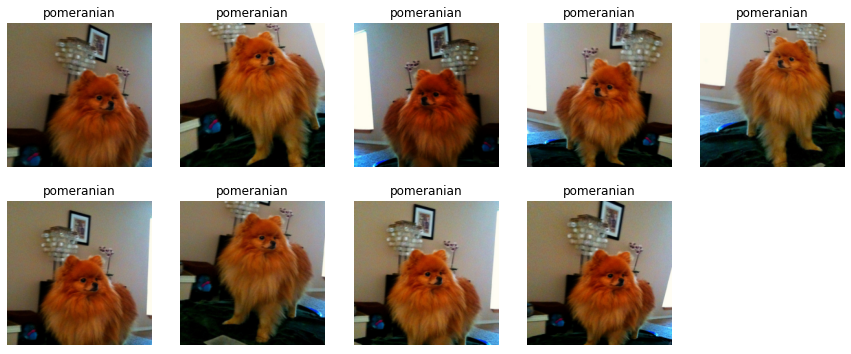

In [ ]:
dls.show_batch(nrows=2, ncols=5, unique=True)

- `method`: `'pad'`, `'crop'`, `'squish'`
- `pad` : 'zeros', 'reflection', 'border'

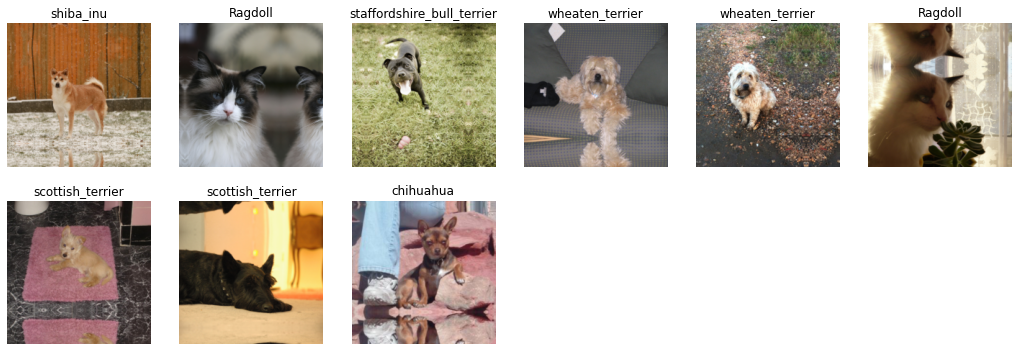

In [ ]:
pets.new(item_tfms=Resize(200, method='pad',pad_mode='reflection' )).dataloaders(image_path).show_batch(nrows=2, ncols=6, unique=False)

- Call single batch by `x, y = dls.one_batch()`
  - You can plot image with `.show()`

In [ ]:
x, y =dls.one_batch()

In [ ]:
x.shape

torch.Size([64, 3, 224, 224])

TensorCategory(15, device='cuda:0')

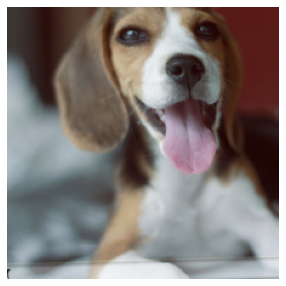

In [ ]:
x[2].show()
y[2]

## 3. Train with Learner
- `Learner` is a class that includes almost everything for training neural network, like model, dataloader, and training loop with optimizer.
  - dataloader: DataLoader of fastai
  - model: Model code
    - `from fastai.vision.all import *` have imported all the vision models, such as `resnet18`, `resnet`
  - `pretrained`
  

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate, pretrained=False)
learn.fit(2)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch,train_loss,valid_loss,error_rate,time
0,4.409769,5.921423,0.958051,01:35
1,4.125578,3.890129,0.904826,01:36


### Transfer learning with `pretrained=True`
- `learn.fine_tune` will update only the last layer of the model

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate, pretrained=True)
learn.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time
0,1.754161,0.423443,0.127199,01:31


epoch,train_loss,valid_loss,error_rate,time
0,0.589760,0.365998,0.117727,01:40
1,0.404153,0.299166,0.094272,01:40


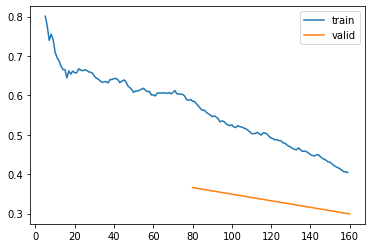

In [ ]:
learn.recorder.plot_loss()

## 4. Check the Prediction
- get interpretation result using `ClassificationInterpretation`

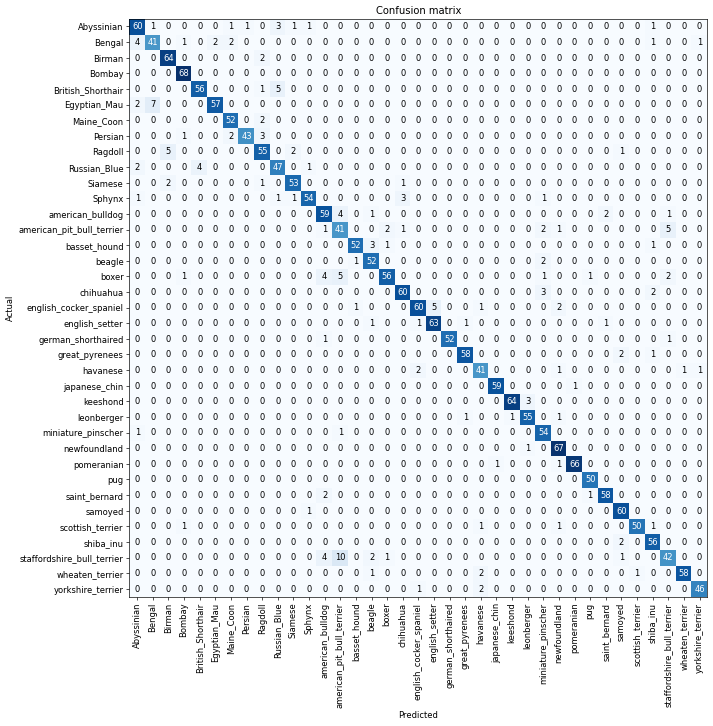

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

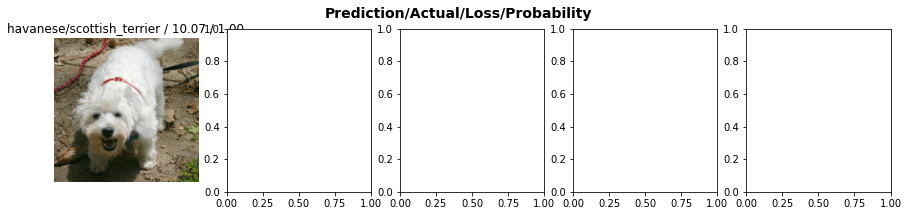

In [ ]:
interp.plot_top_losses(5, nrows=1)

## 5. Find Optimal Learning Rate
- 

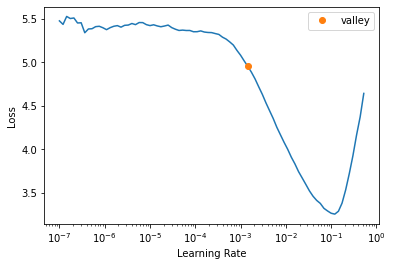

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
lr_output = learn.lr_find()

In [ ]:
lr_output.valley

0.0014454397605732083

IndexError: ignored

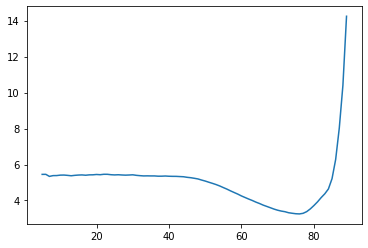